Graph(num_nodes={'concept': 34, 'lecture': 60, 'student': 32946},
      num_edges={('concept', 'teaches', 'lecture'): 68, ('concept', 'understood_by', 'student'): 232806, ('student', 'understands', 'concept'): 232806},
      metagraph=[('concept', 'lecture', 'teaches'), ('concept', 'student', 'understood_by'), ('student', 'concept', 'understands')])
Student node feature shape: torch.Size([32946, 34])
Concept node feature shape: torch.Size([34, 6])
Lecture node feature shape: torch.Size([60, 23])
Edge weights for 'understands': tensor([0.2600, 0.5900, 0.8600, 0.9700, 0.1200])
Node types: ['concept', 'lecture', 'student']
Edge types: ['teaches', 'understood_by', 'understands']
Graph schema: Graph(num_nodes={'concept': 34, 'lecture': 60, 'student': 32946},
      num_edges={('concept', 'teaches', 'lecture'): 68, ('concept', 'understood_by', 'student'): 232806, ('student', 'understands', 'concept'): 232806},
      metagraph=[('concept', 'lecture', 'teaches'), ('concept', 'student', 'underst

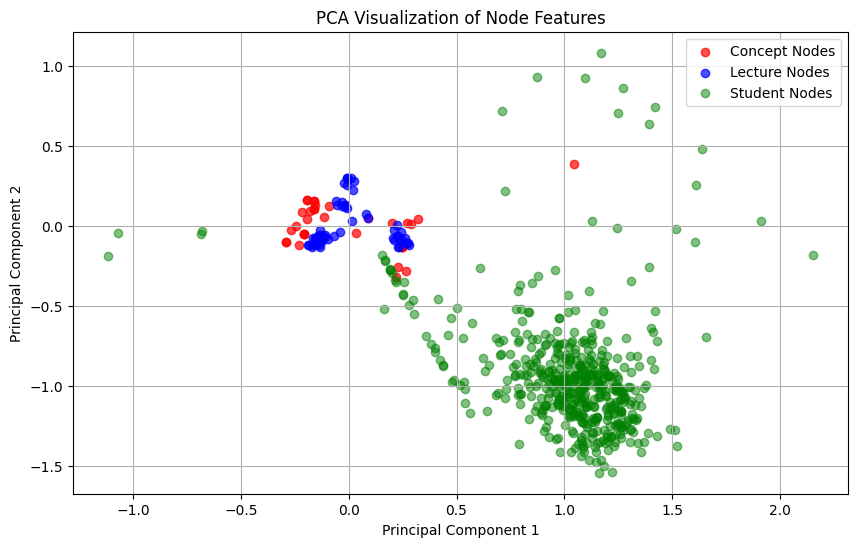

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from graph_generator3 import generate_graph

graph = generate_graph()
# 1. 노드 데이터 불러오기
# 'feat'는 각 노드 타입의 특성 데이터
concept_features = graph.ndata['feat']['concept'].numpy()  # 개념 노드 특성
lecture_features = graph.ndata['feat']['lecture'].numpy()  # 강의 노드 특성
student_features = graph.ndata['feat']['student'].numpy()  # 학생 노드 특성

# 2. PCA 적용 (2차원으로 축소)
pca = PCA(n_components=2)
concept_pca = pca.fit_transform(concept_features)
lecture_pca = pca.fit_transform(lecture_features)
student_pca = pca.fit_transform(student_features)

# 3. 시각화
plt.figure(figsize=(10, 6))

# 개념 노드 시각화
plt.scatter(concept_pca[:, 0], concept_pca[:, 1], alpha=0.7, label='Concept Nodes', color='red')

# 강의 노드 시각화
plt.scatter(lecture_pca[:, 0], lecture_pca[:, 1], alpha=0.7, label='Lecture Nodes', color='blue')

# 학생 노드 시각화 (표본만 선택하여 시각화)
sample_size = 500  # 학생 노드가 많으므로 일부만 시각화
student_sample = student_pca[:sample_size]
plt.scatter(student_sample[:, 0], student_sample[:, 1], alpha=0.5, label='Student Nodes', color='green')

plt.title("PCA Visualization of Node Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()